100%|██████████| 109k/109k [00:00<00:00, 24.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/taeefnajib/used-car-price-prediction-dataset/versions/1


Información inicial del dataset principal:
<class 'pandas.core.frame.DataFrame'>
Index: 394335 entries, 0 to 441452
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   owners          394335 non-null  int64  
 1   year            394335 non-null  int64  
 2   price           394335 non-null  int64  
 3   region          394335 non-null  object 
 4   mileage         394335 non-null  int64  
 5   doors           394335 non-null  float64
 6   class           394335 non-null  object 
 7   body_type       394335 non-null  object 
 8   mark            394335 non-null  object 
 9   model           394335 non-null  object 
 10  super_gen       394335 non-null  object 
 11  steering_wheel  394335 non-null  object 
 12  gear_type       394335 non-null  object 
 13  engine          394335 non-null  object 
 14  transmission    394335 non-null  object 
 15  power           394335 non-null  float64
 16  displacemnt     39

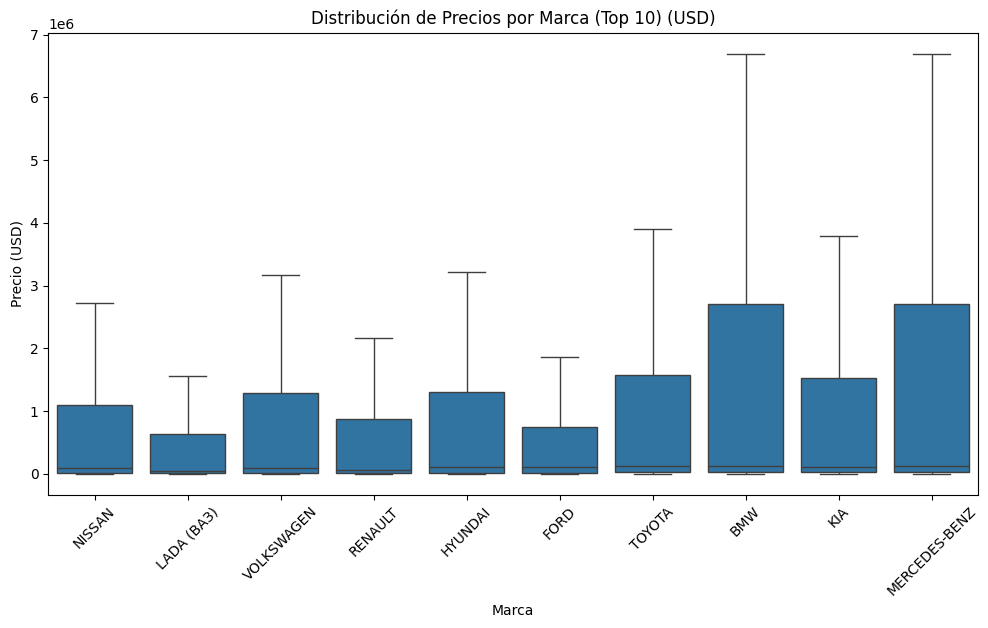


Resumen descriptivo del dataset:
              owners           year         price         region  \
count  389710.000000  389710.000000  3.897100e+05  389710.000000   
mean        2.408812    2012.613574  1.622440e+06      44.671928   
std         1.208780       7.011192  1.377392e+06      21.454670   
min         0.000000    1938.000000  3.000000e+04       0.000000   
25%         1.000000    2008.000000  6.600000e+05      33.000000   
50%         2.000000    2013.000000  1.200000e+06      40.000000   
75%         4.000000    2018.000000  2.100000e+06      65.000000   
max         4.000000    2024.000000  7.690000e+06      86.000000   

              mileage          doors      body_type           mark  \
count   389710.000000  389710.000000  389710.000000  389710.000000   
mean    163981.125501       4.541880      10.504993      71.428642   
std     101227.130893       0.614838       7.929778      33.157067   
min          1.000000       0.000000       0.000000       0.000000   
25%

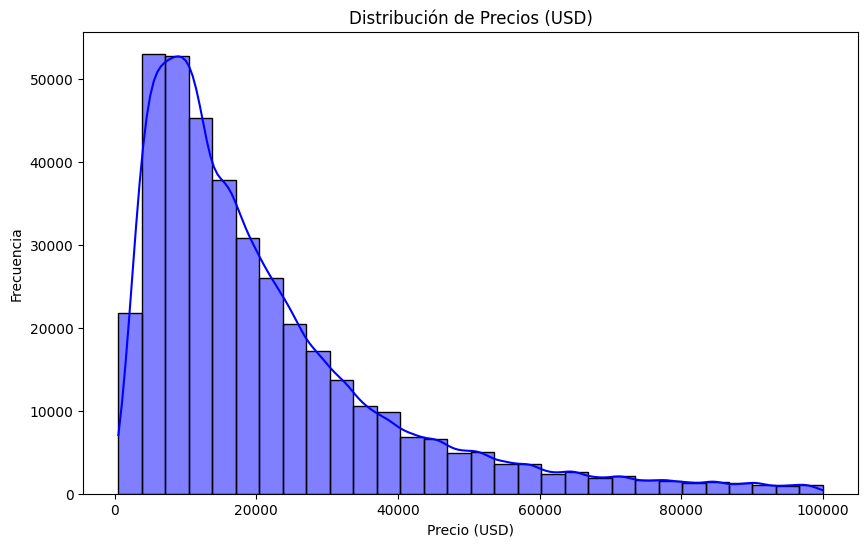

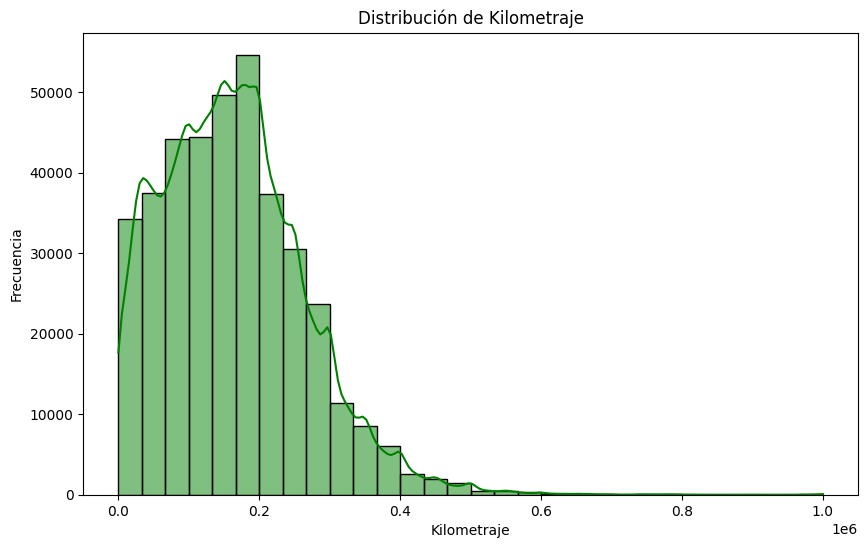

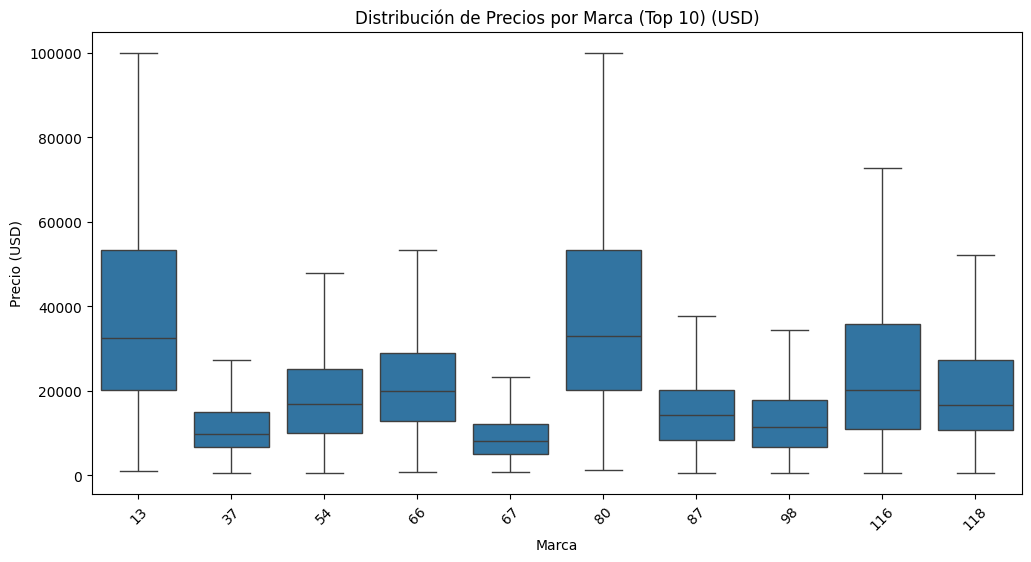

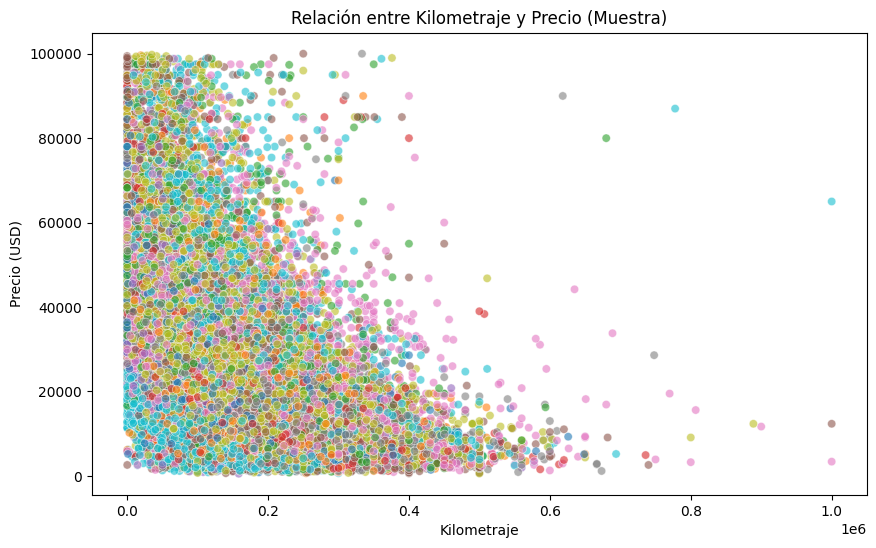

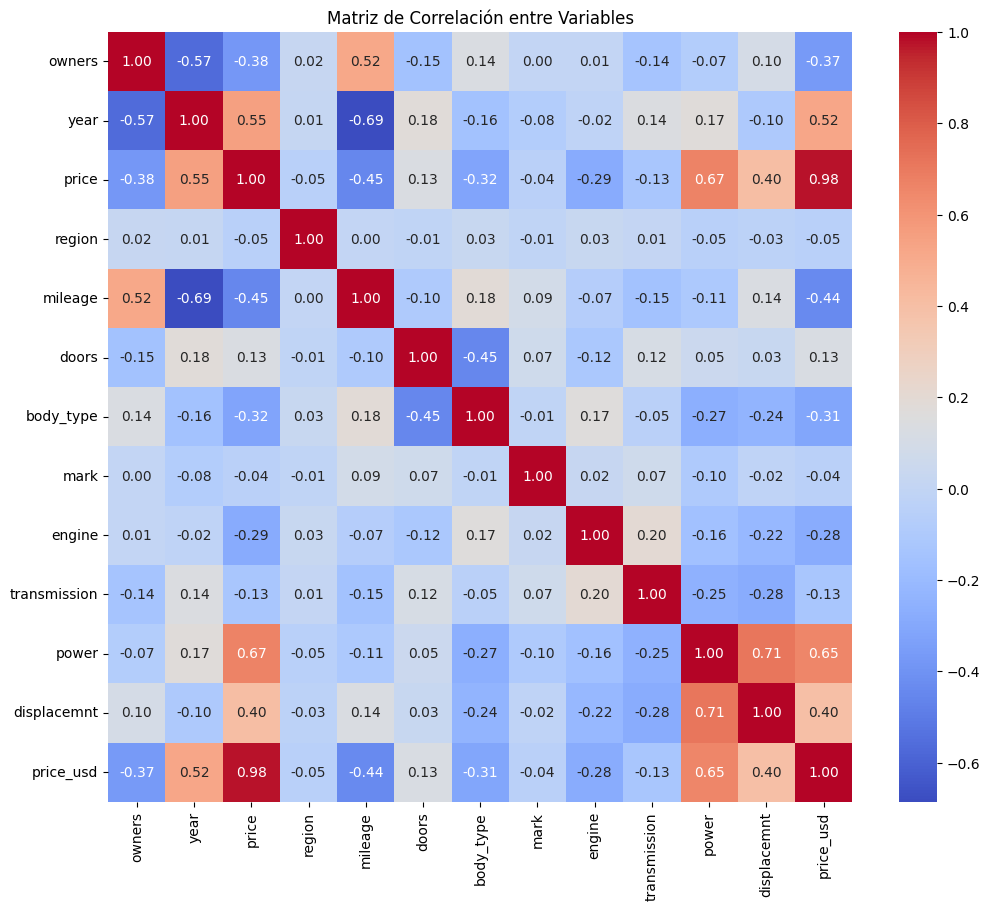


Estadístico t: nan, Valor p: nan
No podemos rechazar H₀.


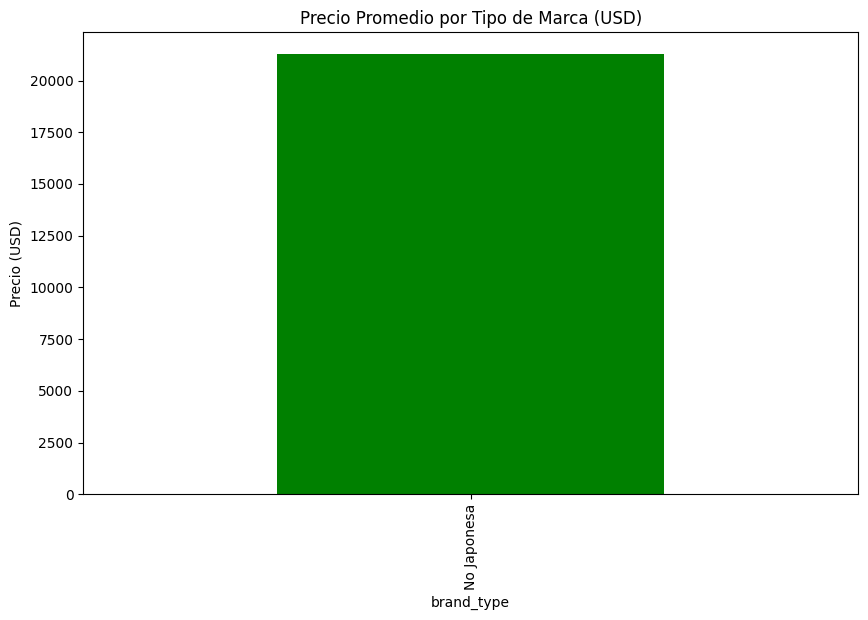

Error cuadrático medio (MSE): 234585226.35801408
Predicción para automóvil japonés: $30208.48 USD
Predicción para automóvil estadounidense: $30208.48 USD


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


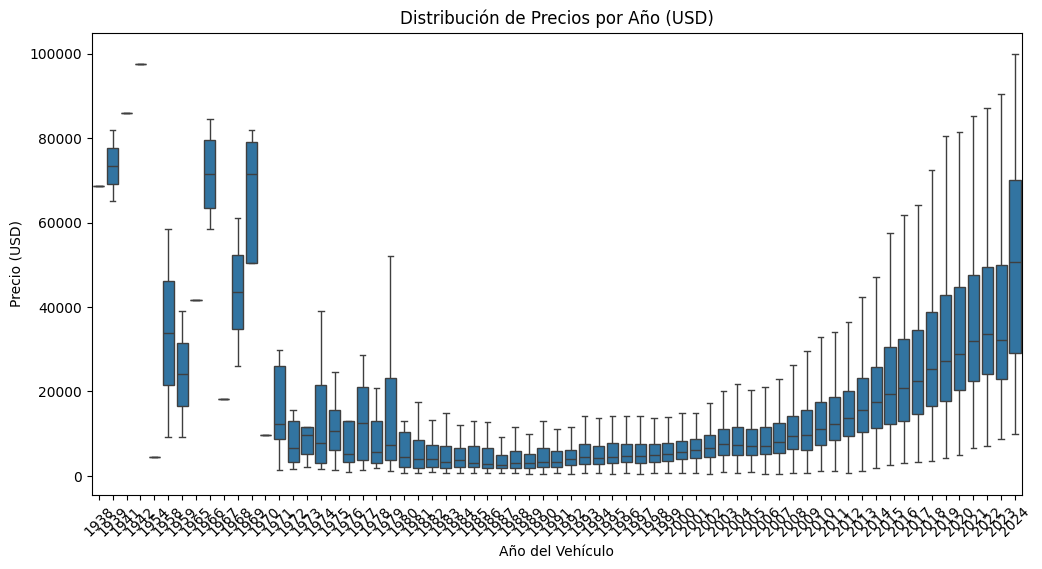

In [ ]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_ind
from sklearn.metrics import mean_squared_error
import kagglehub

# Descargar dataset adicional desde Kaggle
path = kagglehub.dataset_download("taeefnajib/used-car-price-prediction-dataset")
print("Path to dataset files:", path)

# Cargar dataset
df_main = pd.read_csv("/content/dataset_car_used_hugg.csv")

# Tasa de conversión: rublos a dólares (ajusta según sea necesario)
conversion_rate = 0.013

# Preprocesamiento de datos
df_main['price_usd'] = df_main['price'] * conversion_rate
df_main = df_main.dropna()

df_kaggle = pd.read_csv(f"/content/dataset_car_used_hugg.csv")

# Información inicial del dataset principal
print("Información inicial del dataset principal:")
print(df_main.info())
print(df_main.head())

# Información inicial del dataset de Kaggle
print("Información inicial del dataset Kaggle:")
print(df_kaggle.info())
print(df_kaggle.head())

# Normalización y Preprocesamiento
def preprocess_dataset(df):
    # Convertir columnas categóricas a mayúsculas para uniformidad
    if 'mark' in df.columns:
        df['mark'] = df['mark'].str.upper()
    if 'body_type' in df.columns:
        df['body_type'] = df['body_type'].str.upper()
    if 'engine' in df.columns:
        df['engine'] = df['engine'].str.upper()
    if 'transmission' in df.columns:
        df['transmission'] = df['transmission'].str.upper()
    if 'region' in df.columns:
        df['region'] = df['region'].str.upper()

    # Tasa de conversión: rublos a dólares (ajusta según sea necesario)
    if 'price' in df.columns and 'price_usd' not in df.columns:
        df['price_usd'] = df['price']

    # Eliminar valores nulos
    df = df.dropna()

    return df

# Preprocesar ambos datasets
df_kaggle = preprocess_dataset(df_kaggle)
df_main = preprocess_dataset(df_main)
# Combinación de datasets
df = pd.concat([df_main, df_kaggle], ignore_index=True)

print(df.head())

# Marcas más frecuentes
top_brands = df['mark'].value_counts().index[:10]
filtered_df = df[df['mark'].isin(top_brands)]

# Gráfico de precios por marca
plt.figure(figsize=(12, 6))
sns.boxplot(x='mark', y='price_usd', data=filtered_df, showfliers=False)

# Títulos y etiquetas
plt.title("Distribución de Precios por Marca (Top 10) (USD)")
plt.xlabel("Marca")
plt.ylabel("Precio (USD)")

# Rotar las etiquetas para que sean legibles
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

# Convertir columnas categóricas a códigos numéricos
categorical_cols = ['mark', 'body_type', 'engine', 'transmission', 'region']
for col in categorical_cols:
    df[col] = df[col].astype('category').cat.codes

# Filtrar precios extremos
df = df[(df['price_usd'] > 500) & (df['price_usd'] < 100000)]

# Resumen descriptivo
print("\nResumen descriptivo del dataset:")
print(df.describe())

# Gráficos de distribución
plt.figure(figsize=(10, 6))
sns.histplot(df['price_usd'], bins=30, kde=True, color="blue")
plt.title("Distribución de Precios (USD)")
plt.xlabel("Precio (USD)")
plt.ylabel("Frecuencia")
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['mileage'], bins=30, kde=True, color="green")
plt.title("Distribución de Kilometraje")
plt.xlabel("Kilometraje")
plt.ylabel("Frecuencia")
plt.show()

# Marcas más frecuentes y gráfico de precios
top_brands = df['mark'].value_counts().index[:10]
filtered_df = df[df['mark'].isin(top_brands)]

# Gráfico de precios por marca
plt.figure(figsize=(12, 6))
sns.boxplot(x='mark', y='price_usd', data=filtered_df, showfliers=False)
plt.title("Distribución de Precios por Marca (Top 10) (USD)")
plt.xlabel("Marca")
plt.ylabel("Precio (USD)")
plt.xticks(rotation=45)
plt.show()

# Relación entre kilometraje y precio
sampled_df = df.sample(frac=0.1, random_state=42)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='mileage', y='price_usd', hue='mark', data=sampled_df, alpha=0.6, palette="tab10")
plt.title("Relación entre Kilometraje y Precio (Muestra)")
plt.xlabel("Kilometraje")
plt.ylabel("Precio (USD)")
plt.legend([], [], frameon=False)
plt.show()

# Matriz de correlación
numeric_cols = df.select_dtypes(include=np.number)
correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlación entre Variables")
plt.show()

# Comparación de marcas japonesas vs no japonesas
brand_mapping = dict(enumerate(df['mark'].astype('category').cat.categories))
df['mark_name'] = df['mark'].map(brand_mapping)

japanese_brands = ['Toyota', 'Honda', 'Nissan', 'Mazda', 'Subaru']
df['is_japanese'] = df['mark_name'].isin(japanese_brands)

japanese_prices = df[df['is_japanese']]['price_usd']
non_japanese_prices = df[~df['is_japanese']]['price_usd']

t_stat, p_value = ttest_ind(japanese_prices, non_japanese_prices)
print(f"\nEstadístico t: {t_stat}, Valor p: {p_value}")
if p_value < 0.05:
    print("Rechazamos H₀: Las marcas japonesas conservan mejor su valor.")
else:
    print("No podemos rechazar H₀.")

# Precio promedio por tipo de marca
df['brand_type'] = np.where(df['is_japanese'], 'Japonesa', 'No Japonesa')
avg_price = df.groupby('brand_type')['price_usd'].mean()

avg_price.plot(kind='bar', figsize=(10, 6), color=['green', 'blue'])
plt.title("Precio Promedio por Tipo de Marca (USD)")
plt.ylabel("Precio (USD)")
plt.show()

# Regresión lineal
X = df[['mileage', 'year', 'is_japanese']]
y = df['price_usd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Evaluación del modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio (MSE): {mse}")

# Predicción de precios
japanese_car = [[50000, 2018, 1]]
american_car = [[50000, 2018, 0]]

price_japanese = model.predict(japanese_car)[0]
price_american = model.predict(american_car)[0]

print(f"Predicción para automóvil japonés: ${price_japanese:.2f} USD")
print(f"Predicción para automóvil estadounidense: ${price_american:.2f} USD")

# Gráfico de distribución de precios por año
plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='price_usd', data=df, showfliers=False)
plt.title("Distribución de Precios por Año (USD)")
plt.xlabel("Año del Vehículo")
plt.ylabel("Precio (USD)")
plt.xticks(rotation=45)
plt.show()


Mean Squared Error (MSE): 0.49301428036588407
Mean Absolute Error (MAE): 0.5494524038772596
R² Score: 0.3120623313956825


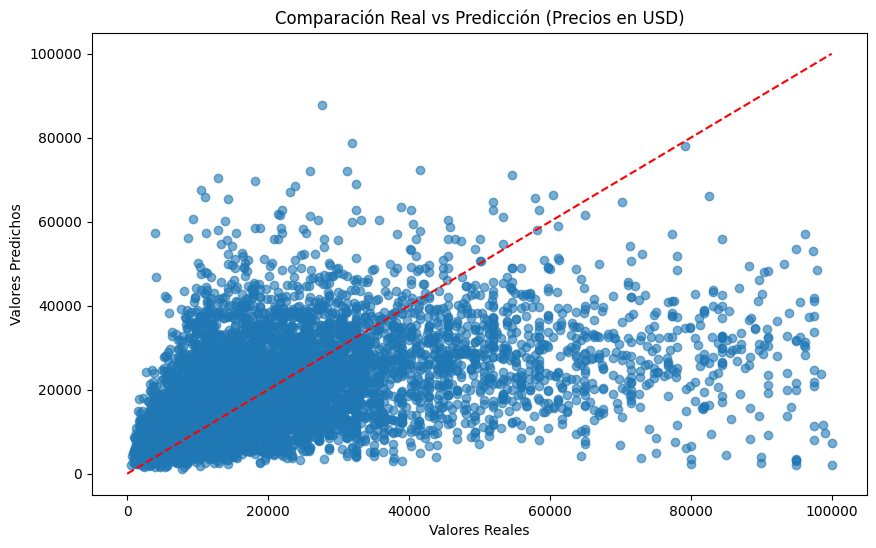

Cross-Validation MSE: 0.48046422157467433


In [ ]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Supongamos que ya tienes el dataframe `df` cargado
# Crear columnas adicionales
df['car_age'] = 2024 - df['year']  # Edad del vehículo
df['km_per_year'] = df['mileage'] / df['car_age']  # Kilometraje por año

# Eliminar valores nulos o inconsistentes
df = df.dropna()  # Eliminar filas con valores nulos
df = df[df['car_age'] > 0]  # Filtrar vehículos con antigüedad positiva
df = df[df['price_usd'] > 0]  # Filtrar precios positivos

# Usar el 20% de los datos para crear un nuevo dataset
df = df.sample(frac=0.2, random_state=42)  # Toma el 50% de los datos de manera aleatoria

# Seleccionar variables independientes (X) y dependientes (y)
X = df[['car_age', 'mileage', 'km_per_year']]  # Características
y = np.log1p(df['price_usd'])  # Transformación logarítmica de precios

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalización de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Generar características polinomiales
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Entrenar un modelo Random Forest
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train_poly, y_train)

# Predicciones
y_pred = model.predict(X_test_poly)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")

# Visualizar las predicciones
plt.figure(figsize=(10, 6))
plt.scatter(np.expm1(y_test), np.expm1(y_pred), alpha=0.6)
plt.plot([0, max(np.expm1(y_test))], [0, max(np.expm1(y_test))], color='red', linestyle='--')
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Comparación Real vs Predicción (Precios en USD)")
plt.show()

# Validación cruzada para evaluar estabilidad del modelo
cv_scores = cross_val_score(model, X_train_poly, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-Validation MSE: {-np.mean(cv_scores)}")


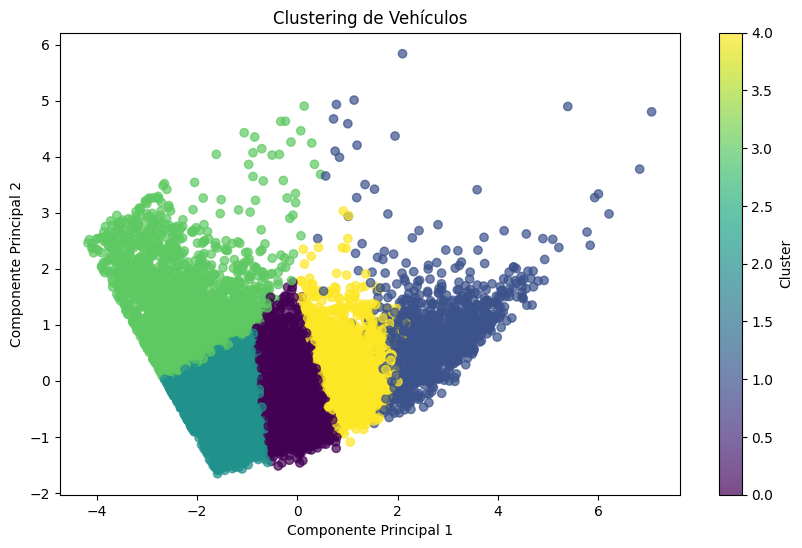

owners            38375
year              38375
price             38375
region            38375
mileage           38375
doors             38375
class             38375
body_type         38375
mark              38375
model             38375
super_gen         38375
steering_wheel    38375
gear_type         38375
engine            38375
transmission      38375
power             38375
displacemnt       38375
color             38375
price_usd         38375
mark_name         38375
is_japanese       38375
brand_type        38375
car_age           38375
km_per_year       38375
dtype: int64


In [ ]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Supongamos que ya tienes el dataframe `df` cargado
# Crear columnas adicionales
df['car_age'] = 2024 - df['year']  # Edad del vehículo
df['km_per_year'] = df['mileage'] / df['car_age']  # Kilometraje por año

# Eliminar valores nulos o inconsistentes
df = df.dropna()  # Eliminar filas con valores nulos
df = df[df['car_age'] > 0]  # Filtrar vehículos con antigüedad positiva
df = df[df['price_usd'] > 0]  # Filtrar precios positivos

# Usar el 50% de los datos para clustering
df_sample = df.sample(frac=0.5, random_state=42)

# Seleccionar características para clustering
features = ['car_age', 'mileage', 'price_usd']
X = df_sample[features]

# Normalización de datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar clustering KMeans
kmeans = KMeans(n_clusters=5, random_state=42)  # 5 grupos (puedes ajustar el número de clusters)
df_sample['cluster'] = kmeans.fit_predict(X_scaled)

# Reducir dimensiones para visualizar los clusters (opcional)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualizar los clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_sample['cluster'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label="Cluster")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Clustering de Vehículos")
plt.show()

# Mostrar los primeros registros con el cluster asignado
print(df.count())
